<h2 align='center'>EE2703: Assignment 6</h2>
<h3 align='center'>Yogesh Agarwala</h3>
<h5 align='center'>April 11, 2021</h5>

# Introduction
In this assignment, we model a tubelight as a one dimensional space of gas in which electrons are continually injected at the cathode and accelerated towards the anode by a constant electric field. The electrons can ionize material atoms if they achieve a velocity greater than some threshold, leading to an emission of a photon. This ionization is modeled as a random process. The tubelight is simulated for a certain number of timesteps from an initial state of having no electrons. The results obtained are plotted and studied.

In [2]:
import numpy as np
import pandas as pd
from pylab import *
import sys

In [18]:
"""
    Taking arguments from the user through commandline
    and if the arguments are not provided then the code 
    will run on the default values
    where,
    n: integer length of tubelight
    M: average number of electrons generated per timestep
    nk: total number of timesteps to simulate
    u0: threshold voltage for ionization
    p: probability of ionization given an electron is faster than the threshold
    Msig: stddev of number of electrons generated per timestep
"""
#command line input
if(len(sys.argv)==7):
    n,M,nk,u0,p,Msig = [int(x) for x in sys.argv[1:7] ]

#default arguments
else:
    n= 100
    M=5
    nk=500
    u0=7
    p=0.5
    Msig=1

# Simulation Function
A function to simulate the tubelight given certain parameters is written below:

In [45]:
"""
    Simulate a tubelight and return the electron positions
    and velocities, and positions of photon emissions.
"""
def simulateTubelight(n,M,nk,u0,p,Msig):

    xx = zeros(n*M)
    u = zeros(n*M)
    dx = zeros(n*M)

    I = []
    X = []
    V = []

    for k in range(nk):

        # add new electrons
        m=int(randn()*Msig+M)
        jj = where(xx==0)
        xx[jj[0][:m]]=1

        # find electron indices
        ii = where(xx>0)

        # add to history lists
        X.extend(xx[ii].tolist())
        V.extend(u[ii].tolist())

        # update positions and speed
        dx[ii] = u[ii]+0.5
        xx[ii]+=dx[ii]
        u[ii]+=1

        # anode check
        kk = where(xx>=n)
        xx[kk]=0
        u[kk]=0

        # ionization check
        kk = where(u>=u0)[0]
        ll=where(rand(len(kk))<=p);
        kl=kk[ll];

        # ionize
        dt = rand(len(kl))
        xx[kl]=xx[kl]-dx[kl]+((u[kl]-1)*dt+0.5*dt*dt)
        u[kl]=0

        # add emissions
        I.extend(xx[kl].tolist())

    return X,V,I


# Plots Function
A function to plot the required graphs is written below:

In [50]:
"""
    Plot histograms for X and I, and a phase space using X and V.
    Returns the emission intensities and locations of histogram bins.
"""
def plotGraphs(X,V,I):
    
    # electron density
    figure()
    hist(X,bins=n,cumulative=False)
    title("Electron density")
    xlabel("$x$")
    ylabel("Number of electrons")
    show()

    # emission instensity
    figure()
    ints,bins,trash = hist(I,bins=n)
    title("Emission Intensity")
    xlabel("$x$")
    ylabel("I")
    show()

    # electron phase space
    figure()
    scatter(X,V,marker='x')
    title("Electron Phase Space")
    xlabel("$x$")
    ylabel("$v$")
    show()
    
    return ints,bins

# Running the simulation
The tubelight is simulated with the default parameters of <br> 
n=100; M = 5; nk =500; u0=7; p=0.5; Msig=0.1

In [61]:
n=100; M = 5; nk =500; u0=7; p=0.5; Msig=0.1

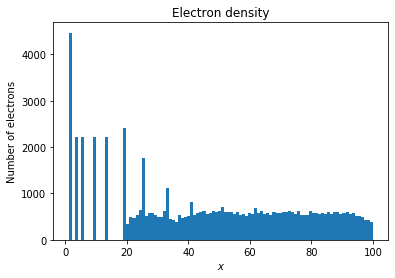

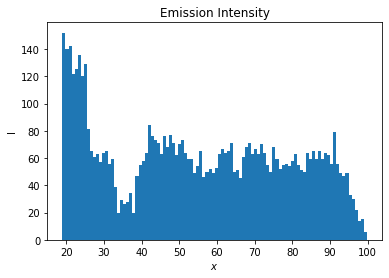

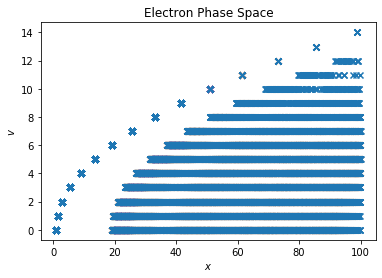

In [62]:
X,V,I = simulateTubelight(n,M,nk,u0,p,Msig)
ints, bins = plotGraphs(X,V,I)

## The emission count for each value of $x$ is tabulated below:

In [49]:
xpos=0.5*(bins[0:-1]+bins[1:])
M = np.c_[xpos,ints]
df = pd.DataFrame(M,columns=['xpos','count'])
print("Intensity Data:")
print(df.to_string(index=False))

Intensity Data:
      xpos  count
 19.405146  154.0
 20.209847  159.0
 21.014547  155.0
 21.819247  155.0
 22.623948  124.0
 23.428648  126.0
 24.233349  126.0
 25.038049  123.0
 25.842749   57.0
 26.647450   68.0
 27.452150   72.0
 28.256850   68.0
 29.061551   62.0
 29.866251   64.0
 30.670951   72.0
 31.475652   59.0
 32.280352   55.0
 33.085053   43.0
 33.889753   30.0
 34.694453   21.0
 35.499154   26.0
 36.303854   30.0
 37.108554   27.0
 37.913255   48.0
 38.717955   49.0
 39.522656   61.0
 40.327356   65.0
 41.132056   58.0
 41.936757   71.0
 42.741457   62.0
 43.546157   82.0
 44.350858   81.0
 45.155558   62.0
 45.960258   77.0
 46.764959   79.0
 47.569659   71.0
 48.374360   81.0
 49.179060   70.0
 49.983760   67.0
 50.788461   67.0
 51.593161   67.0
 52.397861   70.0
 53.202562   64.0
 54.007262   49.0
 54.811963   45.0
 55.616663   59.0
 56.421363   50.0
 57.226064   50.0
 58.030764   60.0
 58.835464   42.0
 59.640165   57.0
 60.444865   53.0
 61.249566   55.0
 62.054266  

# Altering Simulation Parameters

We try out the following set of parameters:
1. n=100, M = 5, nk =1000, u0=12, p=0.5,Msig=0.2 (larger threshold velocity).
2. n=100, M = 5, nk =1000, u0=7, p=0.1 ,Msig=0.2 (lower probabiltiy of collision).
3. n=100, M = 5, nk =1000, u0=7, p=0.1 ,Msig=4 (higher variance of randomness(normal variable)).

#### Larger threshold velocity

In [59]:
n=100; M = 5; nk =1000; u0=12; p=0.5; Msig=0.2

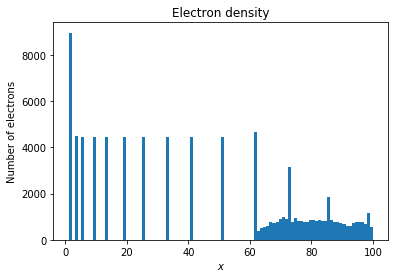

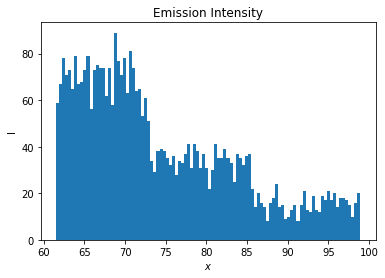

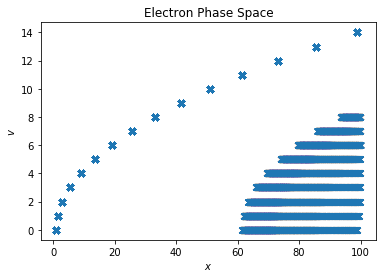

In [60]:
X,V,I = simulateTubelight(n,M,nk,u0,p,Msig)
ints, bins = plotGraphs(X,V,I)

### Lower probabiltiy of collision

In [64]:
n=100; M = 5; nk =1000; u0=7; p=0.1; Msig=0.2

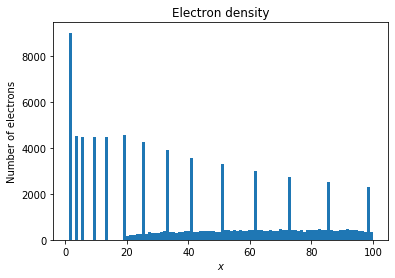

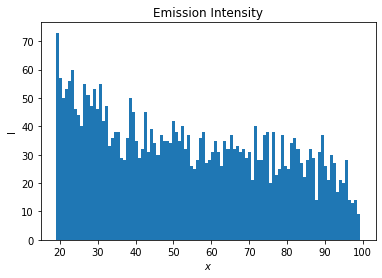

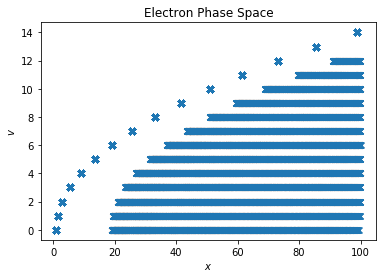

In [65]:
X,V,I = simulateTubelight(n,M,nk,u0,p,Msig)
ints, bins = plotGraphs(X,V,I)

### Higher variance of randomness(normal variable)

In [68]:
n=100; M = 5; nk =1000; u0=7; p=0.1; Msig=4

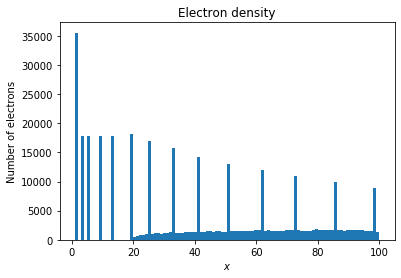

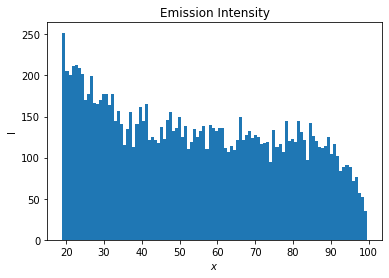

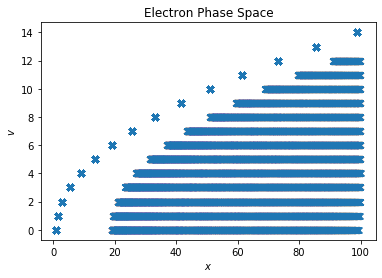

In [70]:
X,V,I = simulateTubelight(n,M,nk,u0,p,Msig)
ints, bins = plotGraphs(X,V,I)

# Conclusion

This week’s assignment covers using python to simulate models for various requirements. In this
case,we utilsise it for simualting electron motion in a tubelight, and hence find out the illumination
at different points. The existence of an initial peak, and those of dark patches. In the subsequent
sections, we also went over the effect of changing various parameters including probability of
collision, threshold velocities and standard deviation.
<br>

#### We can make the following observations from the above plots:

* The electron density is peaked at the initial parts of the tubelight as the electrons are gaining speed here and are not above the threshold. This means that the peaks are the positions of the electrons at the first few timesteps they experience.
<br><br>
* The peaks slowly smoothen out as $x$ increases beyond $19$. This is because the electrons achieve a threshold speed of $7$ only after traversing a distance of $19$ units. This means that they start ionizing the gas atoms and lose their speed due to an inelastic collision.
<br><br>
* The emission intensity also shows peaks which get diffused as $x$ increases. This is due the same reason as above. Most of the electrons reach the threshold at roughly the same positions, leading to peaks in the number of photons emitted there.
<br><br>
* This phenomenon can also be seen in the phase space plot. Firstly, the velocities are restricted to discrete values, as the acceleration is set to $1$, and we are not yet performing accurate velocity updates after collisions.
<br><br>
* One trajectory is separated from the rest of plot. This corresponds to those electrons which travel until the anode without suffering any inelastic collisions with gas atoms. This can be seen by noticing that the trajectory is parabolic. This means that $v \space = k \sqrt{x}$, which is precisely the case for a particle moving with constant acceleration.
<br><br>
* The rest of the plot corresponds to the trajectories of those electrons which have suffered at least one collision with an atom. Since the collisions can occur over a continuous range of positions, the trajectories encompass all possible positions after $x=19$. 
<br><br>
* A gas which has a lower threshold velocity and a higher ionization probability is better suited for use in a tubelight, as it provides more uniform and a higher amount of photon emission intensity.
<br><br>
* The intensity histogram reveals that the electrons do not cause excitation of atoms till they cross a particular threshold velocity, as dictated by the nature of the gas used. Secondly, this gives rise to a peak in intensity just after the first mean length. This is beaucse a majority of electrons collide with atoms at this distance. Further this, subsequent peaks do exist, but have larger spread and are less prominent. We observer around 2 dark bands in this intensity profile.
<br><br>
* The electron phase plots show the constant acceleration all electrons initially undergo, and the subsequent random motion post collision. The phase plots are nearly uniformly distributed in the middle portion of the tubelight.